<H1 style="background-color:#00008b;color:#F8F8FF;">Project Report - Phillip Marsh</H1>
<hr>

<H2 style="color:#00008b;">GitHub URL</H2>
Phillip's GutHub can be found at: <a href="https://github.com/PhillipNM/UCDPA_PhillipMarsh" target="_blank">Phillip's GitHub Repository</a>
<pre style="font-family:arial;">
document should contain between 1,500 and 2,00 words
</pre>
<h2 style="color:#00008b;">Abstract</h2>
(short overview of the entire project)

<h2 style="color:#00008b;">Introduction</h2>
(Explain why you chose this project use case)

<h2 style="color:#00008b;">Datasets</h2>
(Provide a description of your dataset and source. Also justify why you chose this source)

<h6>Deciding on the dataset</h6>
<br>
I had several ideas, however, I explored three main ideas:

<pre style="font-family:arial;">
1. Predicting currency fx changes to maximise buys and sells.  
    As I have two children in Canada in university the fx rate for USD to CAD is always top of mind.  After exploring this for a bit the challenge to understand the market conditions that I could use for making predictions did not seem to fit well with what I needed for this project.
2. Flight delays, cancellations and the average compensation.  Are the airlines "gaming" the system to not pay-out customers
    given the turmoil in travel I thought it would be interesting to compare recent cancellations, delays and reasons and compensations vs. pre-covid data. I researched for datasets but could not find anything current, although there were some sites that may have had data; I would have to pay for and for this reason I decided against this topic.
3. COVID data.  This idea would have plenty of source data out there but would it offer the ability to make predictions and not just forecasting trends.
</pre>

   I picked the COVID idea as there is good data and the types of calculations and techniques required would lend itself to the project easily. This data is something we are all very familiar with at this time. Governments, countries and organizations and corporations have struggled with rules and regulations to balance controlling the epidemic vs. economic stability.

I reviewed a couple of sources and in the end selected "Our World In Data" (OWID).  OWID has a comprehensive set of publicly available data specifically for COVID.  In working with the FIL business continuity team, I assited with the COVID response. I came across this data source and found it very useful. In the end this is the source we used to provide global situational updates for the senior members in the organization so they could decide on stay at home and return to office across the organization.

source of covid data: https://github.com/owid/covid-19-data/tree/master/public/data 
<p>Originally I downloaded a (.csv) copy of the data to use but the file was large (I was getting an error that the file was to big for my type of GitHub repository account) when I tried to push the data to my GitHub repository.  I then researched how I could link to an external csv file, and this solved the problem</p>

source of GDP data: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false
<p>the file is a zip file which is difficult to connect to so in this case I downloaded the file and unzipped it.</p>


<h3>Import and review the data</h3>

In [1]:
# Import packages
import pandas as pd
import requests
import io
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
import seaborn as sb

from datetime import datetime
from datetime import timedelta




<h4>import data</h4>

In [2]:
# Import COVID data

# Link and download COVID dataset from OWID
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv" 
download = requests.get(url).content

# Create the COVID as a pandas dataframe
covid_data_raw = pd.read_csv(io.StringIO(download.decode('utf-8')),parse_dates=['date']) #need to parse the date field
#source: https://stackoverflow.com/questions/59004960/converting-date-format-in-a-dataframe-from-a-csv-file

# Import World Bank GDP data
    # source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false

    # Create the GDP raw file as a pandas dataframe
gdp_data_raw = pd.read_csv("/Users/Phillip/UDCPA_PhillipMarsh/data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4489151.csv", skiprows=4)

 

In [3]:
# Understanding the data for COID data

# Data information what are the available columns
print(covid_data_raw.info())

print(covid_data_raw.head()) 
# There are a lot of columns, I can drop many of them to imporve performance and the size of the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215629 entries, 0 to 215628
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    215629 non-null  object        
 1   continent                                   203203 non-null  object        
 2   location                                    215629 non-null  object        
 3   date                                        215629 non-null  datetime64[ns]
 4   total_cases                                 206715 non-null  float64       
 5   new_cases                                   206381 non-null  float64       
 6   new_cases_smoothed                          205199 non-null  float64       
 7   total_deaths                                187888 non-null  float64       
 8   new_deaths                                  187808 non-null  float64      

In [4]:
# drop columns
    #source: https://datatofish.com/drop-columns-pandas-dataframe/#:~:text=Here%20is%20the%20approach%20that%20you%20can%20use,Python%20code%20to%20drop%20the%20%E2%80%98Shape%E2%80%99%20column%20is%3A
covid_data = covid_data_raw.drop([
    'continent',
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'new_cases_smoothed_per_million',
    'new_deaths_smoothed_per_million',
    'icu_patients_per_million',
    'hosp_patients',
    'hosp_patients_per_million',
    'weekly_icu_admissions',
    'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million',
    'total_tests_per_thousand',
    'new_tests_per_thousand',
    'new_tests_smoothed',
    'tests_per_case',
    'tests_units',
    'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred',
    'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred',
    'stringency_index','median_age',
    'aged_65_older',
    'aged_70_older',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'female_smokers',
    'male_smokers',
    'handwashing_facilities',
    'hospital_beds_per_thousand',
    'life_expectancy',
    'human_development_index',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative',
    'excess_mortality',
    'excess_mortality_cumulative_per_million'
    ], 
    axis=1)

print(covid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215629 entries, 0 to 215628
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         215629 non-null  object        
 1   location                         215629 non-null  object        
 2   date                             215629 non-null  datetime64[ns]
 3   total_cases                      206715 non-null  float64       
 4   new_cases                        206381 non-null  float64       
 5   total_deaths                     187888 non-null  float64       
 6   new_deaths                       187808 non-null  float64       
 7   total_cases_per_million          205767 non-null  float64       
 8   new_cases_per_million            205433 non-null  float64       
 9   total_deaths_per_million         186953 non-null  float64       
 10  new_deaths_per_million           186873 non-

In [5]:
# How many records am I dealing with
total_records = covid_data.count(axis=1)
print(total_records)
print("")

# show the countries/ locations in the data
print(covid_data.pivot_table(index = ['iso_code', 'location'], aggfunc ='size'))

print("")
# df.shape
print("Shape:")
print(covid_data.shape)

print("")
# df.size
print("Size:")
print(covid_data.size)

print("")
# df.isnull()
column_picker ="total_deaths"
bool_series_null =pd.isnull(covid_data[column_picker])

print("Null",column_picker,": ")
print(covid_data[bool_series_null])
#print(covid_data.isnull())

print("")
# df.notnull()
bool_series =pd.notnull(covid_data[column_picker])
print("Not null:")
print(covid_data[bool_series])

# df.corr()



0         10
1         10
2         10
3         10
4         10
          ..
215624    15
215625    19
215626    15
215627    15
215628    15
Length: 215629, dtype: int64

iso_code  location    
ABW       Aruba           913
AFG       Afghanistan     931
AGO       Angola          906
AIA       Anguilla        898
ALB       Albania         930
                         ... 
WSM       Samoa           663
YEM       Yemen           885
ZAF       South Africa    948
ZMB       Zambia          908
ZWE       Zimbabwe        906
Length: 244, dtype: int64

Shape:
(215629, 26)

Size:
5606354

Null total_deaths : 
       iso_code     location       date  total_cases  new_cases  total_deaths  \
0           AFG  Afghanistan 2020-02-24          5.0        5.0           NaN   
1           AFG  Afghanistan 2020-02-25          5.0        0.0           NaN   
2           AFG  Afghanistan 2020-02-26          5.0        0.0           NaN   
3           AFG  Afghanistan 2020-02-27          5.0        0.0   

In [6]:
# Import GDP data

#look at info for gdp data
print(gdp_data_raw.info())

# do not need most of the columns so will remove cols 4:63
gdp_data = gdp_data_raw.drop(gdp_data_raw.iloc[:,4:63],axis = 1)

gdp_data.columns = [c.replace(' ', '_') for c in gdp_data.columns]

print(gdp_data.info())
print()
print(gdp_data.head())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            133 non-null    float64
 5   1961            135 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            155 non-null    float64
 12  1968            160 non-null    float64
 13  1969            160 non-null    float64
 14  1970            169 non-null    float64
 15  1971            172 non-null    float64
 16  1972            172 non-null    float64
 17  1973            172 non-null    flo

<h4>Summary of data</h4>

In [7]:
# Summary of Covid data

# Number of unique countries
n = covid_data.iso_code.nunique()
print("No of unique countries: ",n)
print("")

# Number of unique dates
n = covid_data.date.nunique()

# What are the range of dates in data
beg_date = min(covid_data["date"]) #starting point of the available data
end_date = max(covid_data["date"]) #most recent data in the file

print("No of unique dates: ",n)
print("From: ",beg_date.strftime("%b %d %Y")," to: ",end_date.strftime("%b %d %Y"))
print("")

# Number of records
rec = covid_data.shape[0]
col = covid_data.shape[1]

print("No of rows: ",f"{rec:,d}")
print("No of columns: ",f"{col:,d}") 
#source: https://stackoverflow.com/questions/60934535/format-integer-with-comma-using-python-printf
print("")

No of unique countries:  244

No of unique dates:  985
From:  Jan 01 2020  to:  Sep 11 2022

No of rows:  215,629
No of columns:  26



In [8]:
# Summary of GDP data

# Number of unique countries
n = gdp_data.Country_Code.nunique()
print("No of unique countries: ",n)
print("")

# Number of records
rec = gdp_data.shape[0]
col = gdp_data.shape[1]

print("No of rows: ",f"{rec:,d}")
print("No of columns: ",f"{col:,d}") 

No of unique countries:  266

No of rows:  266
No of columns:  8


In [9]:
# Calculations for report:

# date calculations
# There needs to be a n_day (number of days) total for certain total columns to in turn calculate 
# comparative data against 100k of a countries population

days_calc = 14 #n days for calculations.  14 days is standard but we could run for differnt number of days eg. 25days

# n day calculations can't begin until the nth day after the first date in the dataset (beg_date)
first_calc_date = beg_date + - timedelta(days=days_calc)


# calculate the start date for the n days data for each record
n_day_start = covid_data["date"] - timedelta(days=days_calc)

print(n_day_start)
print()

# Insert a column with the n day start date
covid_data.insert(loc=3, column="n_day_start_date", value=n_day_start, allow_duplicates=True)
print(covid_data.info())



0        2020-02-10
1        2020-02-11
2        2020-02-12
3        2020-02-13
4        2020-02-14
            ...    
215624   2022-08-24
215625   2022-08-25
215626   2022-08-26
215627   2022-08-27
215628   2022-08-28
Name: date, Length: 215629, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215629 entries, 0 to 215628
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         215629 non-null  object        
 1   location                         215629 non-null  object        
 2   date                             215629 non-null  datetime64[ns]
 3   n_day_start_date                 215629 non-null  datetime64[ns]
 4   total_cases                      206715 non-null  float64       
 5   new_cases                        206381 non-null  float64       
 6   total_deaths                     187888 non-null  flo

In [10]:
# n days totals 
# (https://stackoverflow.com/questions/28236305/how-do-i-sum-values-in-a-column-that-match-a-given-condition-using-pandas)
# https://python.tutorialink.com/calculate-14-day-rolling-average-on-data-with-two-hierarchies/

covid_data.sort_values(['iso_code','date'], ascending=(True,True), inplace=True)

# Rolling new cases 
rolling_new_cases = covid_data.groupby(['iso_code'])['new_cases'].transform(lambda x: x.rolling(days_calc, 1).sum())


# Insert a column with the "n" rolling new cases
covid_data.insert(loc=6, column=str(days_calc)+"_days_rolling_new_cases", value=rolling_new_cases, allow_duplicates=False)


# Test data using the iso code for USA
covid_data_usa = covid_data[covid_data["iso_code"]=="USA"]

print(covid_data_usa.head(20))



       iso_code       location       date n_day_start_date  total_cases  \
203236      USA  United States 2020-01-22       2020-01-08          1.0   
203237      USA  United States 2020-01-23       2020-01-09          1.0   
203238      USA  United States 2020-01-24       2020-01-10          2.0   
203239      USA  United States 2020-01-25       2020-01-11          2.0   
203240      USA  United States 2020-01-26       2020-01-12          5.0   
203241      USA  United States 2020-01-27       2020-01-13          5.0   
203242      USA  United States 2020-01-28       2020-01-14          5.0   
203243      USA  United States 2020-01-29       2020-01-15          6.0   
203244      USA  United States 2020-01-30       2020-01-16          6.0   
203245      USA  United States 2020-01-31       2020-01-17          8.0   
203246      USA  United States 2020-02-01       2020-01-18          8.0   
203247      USA  United States 2020-02-02       2020-01-19          8.0   
203248      USA  United S

<h2 style="color:#00008b;">Implementation Process</h2>
(describe your entire process in detail)

For this project deciding on the data was quite a challenge.  I had quite a few ideas, but none seemed to have the data readily available to produce within the timeline or data did not appear to lend its self to the different techniques required


<h6>Hypothesis</h6>
My hypothesis is that countries with higher density and lower GDP have higher mortality rates than for higher density higher GDP countries. It would also be interesting to see if lower density and higher GDP countries fared and if density and GDP are a predicor of mortaility for a disease like COVID

Linking to data
	Different sources 

Exploring, Understanding and Cleaning data
	Print summary statistics
	Print DataFrame information
	Inspect for missing values
	
	Use visuals to identify issues with the data?
	
	df.info()
	df.shape
	df.size
	df.isnull()
	df.corr()
	List of column headers
	
	Handle the missing values (replace with NaN)
	
Joining data
Using dictionaries
Using dataframes
	
Charting
	Build a chart
		Colour, size, types
	Can we build a dashboard
	Can we make the charts interactive
	Annotate anomalies
	Build a story
	
	
Dates
	COVID creating 14 day averages per 100k of the population
		New cases
		Total cases
		New deaths
		Total deaths
		
	Can we identify the dates of lockdowns and the impact on positive cases per 100k; how long after a lockdown did the rates come back down, can we compare to a country that did not implement lockdowns
	
		Total positive cases
		Cases in hospital 
		Cases in ICU
		Reproduction rate
		
	Is there a correlation between
		The GDP of a country and the fatality
		The population density and the fatality
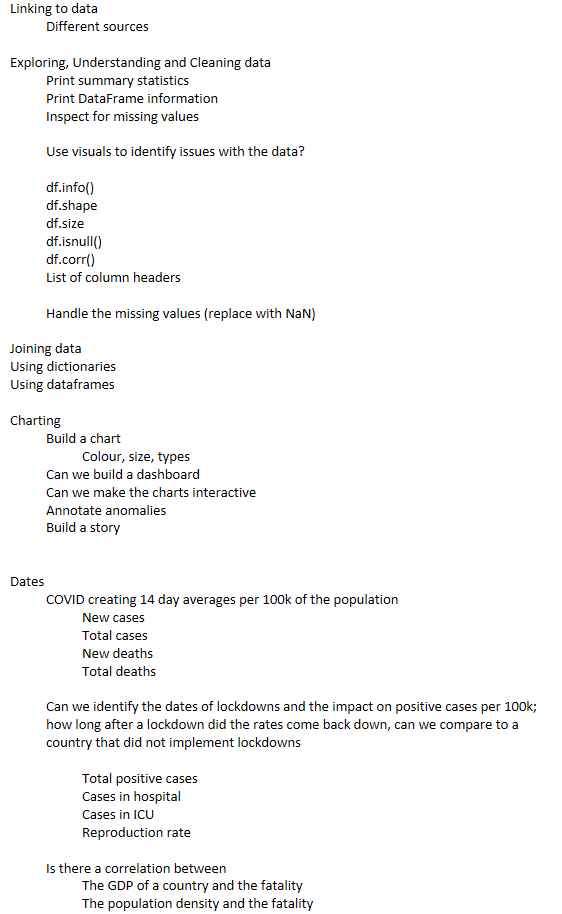

<h2 style="color:#00008b;">Results</h2>

<h2 style="color:#00008b;">Insights</h2>

<h2 style="color:#00008b;">References</h2>
HTML Code help: <a href="https://www.w3schools.com/html/html_links.asp" target="_blank">W3 Schools</a> 

Our World in Data (OWID): <a href="https://ourworldindata.org/coronavirus#explore-the-global-situation" target="_blank">https://ourworldindata.org/coronavirus#explore-the-global-situation</a> 

The World Bank GDP: <a href="https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false" target="_blank">https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false</a>

Python:
    <p>formatting numbers: https://pythonguides.com/python-format-number-with-commas/#:~:text=Python%20format%20number%20with%20commas%20Let%20us%20see,comma%20to%20every%20thousand%20places%20starting%20from%20left.</p>
    <p>formatting dates: https://stackabuse.com/how-to-format-dates-in-python/</p>
    